<a href="https://colab.research.google.com/github/jimmynewland/colabnotebooks/blob/main/CMD_from_Gaia_using_IRSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Color-Magnitude Diagrams using Gaia data from IRSA

This Python Jupyter Notebook running on Google Colab is a companion to the [Color-Magnitude Diagram using Gaia and IRSA activity](https://docs.google.com/document/d/12A1GQ6mf0feTEJzhqQqQHBhHmT3FknKORnT4TZSfGCY/edit?usp=sharing).

This notebook takes sources extracted from the Gaia catalog within the Infrared Science Archive (IRSA) and builds a color-magnitude diagram for the dataset.

The columns used in this notebook from the [Gaia catalog at IRSA](https://irsa.ipac.caltech.edu/data/Gaia/dr3/gaia_dr3_source_colDescriptions.html) are [parallax](https://crpurcell.github.io/AstroParallax/) ('parallax'), [color index](https://openstax.org/books/astronomy-2e/pages/17-2-colors-of-stars) ('bp_rp'), and [magnitude](https://openstax.org/books/astronomy-2e/pages/17-1-the-brightness-of-stars) for the source in the green channel ('phot_g_mean_mag').



#Python Code

In [19]:
# @title Install Astroquery
!pip install -U astroquery

In [11]:
# @title Import Libraries
from astropy.table import Table
from astroquery.ipac.irsa import Irsa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
# @title Cluster Data URL List
clusters= [
    'https://thinkingwithcode.com/datascience/collinder110_gaia_dr3.tbl', # Collinder 110 at index 0
    'https://thinkingwithcode.com/datascience/m13_gaia_dr3.tbl',          # M13 at index 0
    'https://thinkingwithcode.com/datascience/melotte71_gaia_dr3.tbl',    # Melotte 71 at index 0
    'https://thinkingwithcode.com/datascience/ngc4755_gaia_dr3.tbl']      # NGC 4755 at index 0

##Select a Cluster

* Collinder 110 is clusters[0]
* M13 is is clusters[1]
* Melotte 71 is is clusters[2]
* NGC 4755 is is clusters[3]

In [13]:
# @title Load A Single Cluster as a Table and Create a Dataframe

t = Table.read(clusters[0], format='ascii.ipac')
df = t.to_pandas()

In [14]:
# @title Filter the Parallax Values
df_filtered = df[(df['parallax'] > 0.30) & (df['parallax'] < 0.50)]

In [15]:
# @title Define Distance Modulus Function
def distance_modulus(app_mag, parallax):
  return app_mag - (5 - 5*np.log10(1000/parallax))

In [16]:
# @title Calculate Absolute Magnitudes and Add to Dataframe
abs_mag = distance_modulus(df_filtered['phot_g_mean_mag'], df_filtered['parallax'])
df_filtered['abs_mag'] = abs_mag

/tmp/ipython-input-3704858660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['abs_mag'] = abs_mag


In [17]:
# @title Display First Rows of Table for Inspection
display(df_filtered[['bp_rp', 'parallax', 'abs_mag']].head(10))

,bp_rp,parallax,abs_mag
4,0.569270,0.3787,26.212597
6,0.890297,0.4732,27.959533
11,1.200420,0.4349,29.079583
12,1.083540,0.3369,30.045860
14,1.042339,0.4341,28.690316
17,1.200754,0.4950,29.404640
18,0.612742,0.4162,25.556705
19,0.559971,0.4616,25.235357
21,1.291885,0.4692,32.343066
26,1.253159,0.3580,29.796423


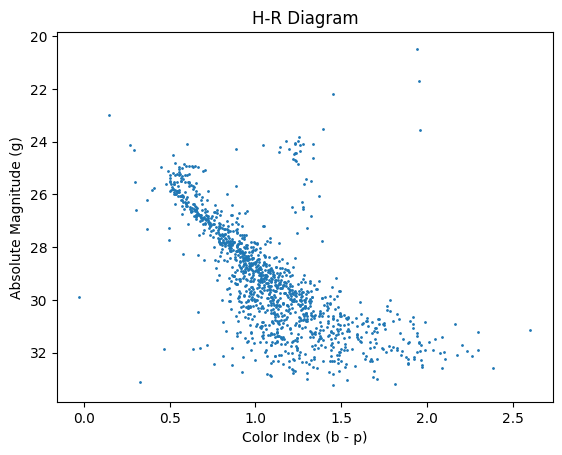

In [18]:
# @title Plot Color-Magnitude Diagram (CMD)
fig, ax = plt.subplots()

x = df_filtered['bp_rp']
y = df_filtered['abs_mag']

ax.scatter(x, y, s=1)

ax.set_xlabel('Color Index (b - p)')
ax.set_ylabel('Absolute Magnitude (g)')
ax.set_title('H-R Diagram')
ax.invert_yaxis()

plt.show()